# New Section

# New Section

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of images found: 97
First few image paths: ['/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)/Image_10.jpg', '/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)/Image_1.jpg', '/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)/Image_15.jpg', '/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)/Image_104.jpg', '/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)/Image_102.jpg']


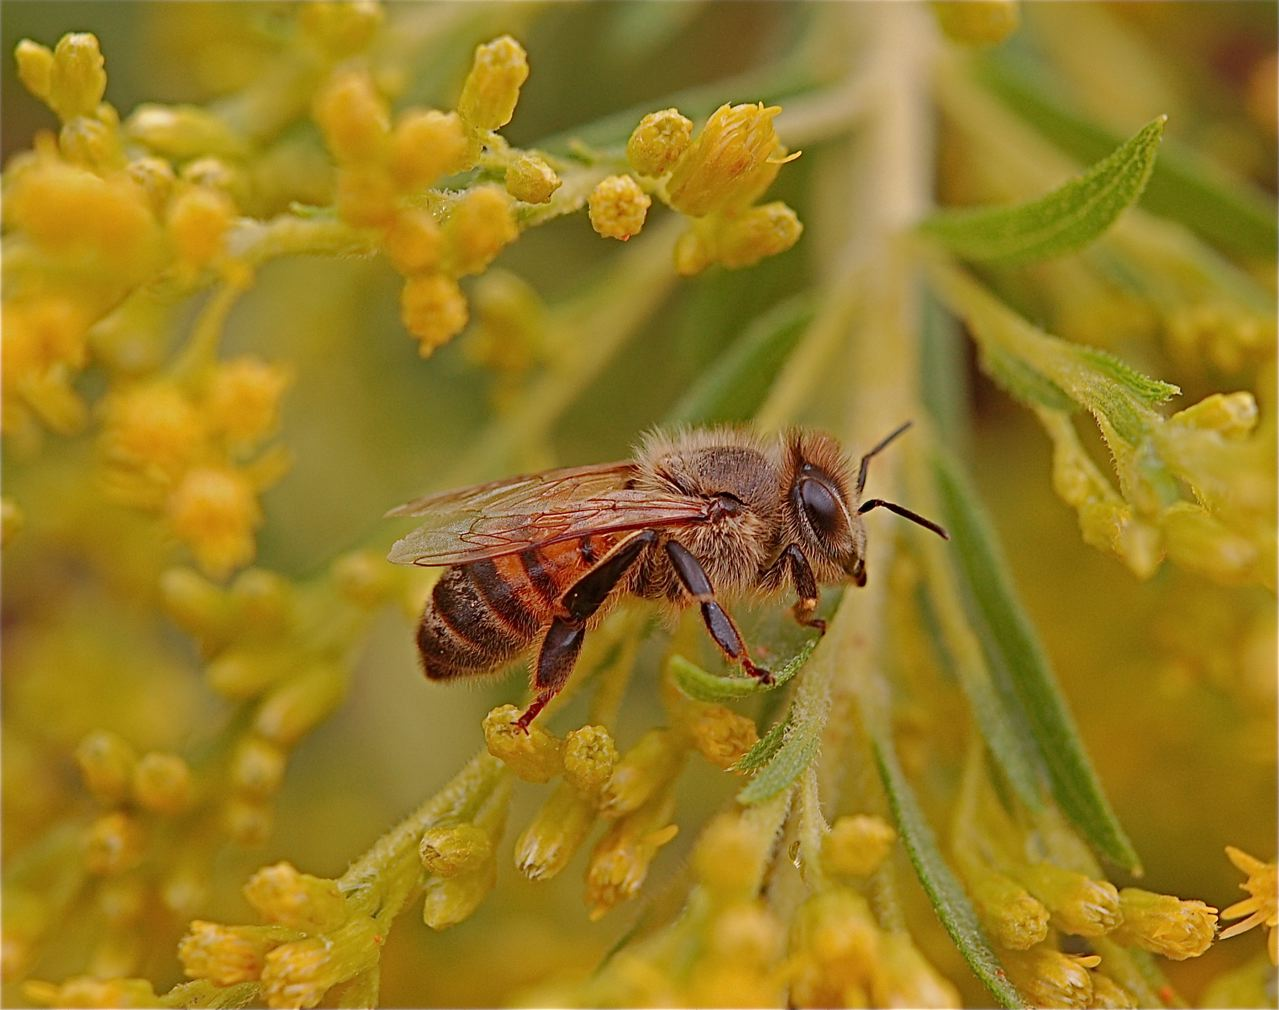

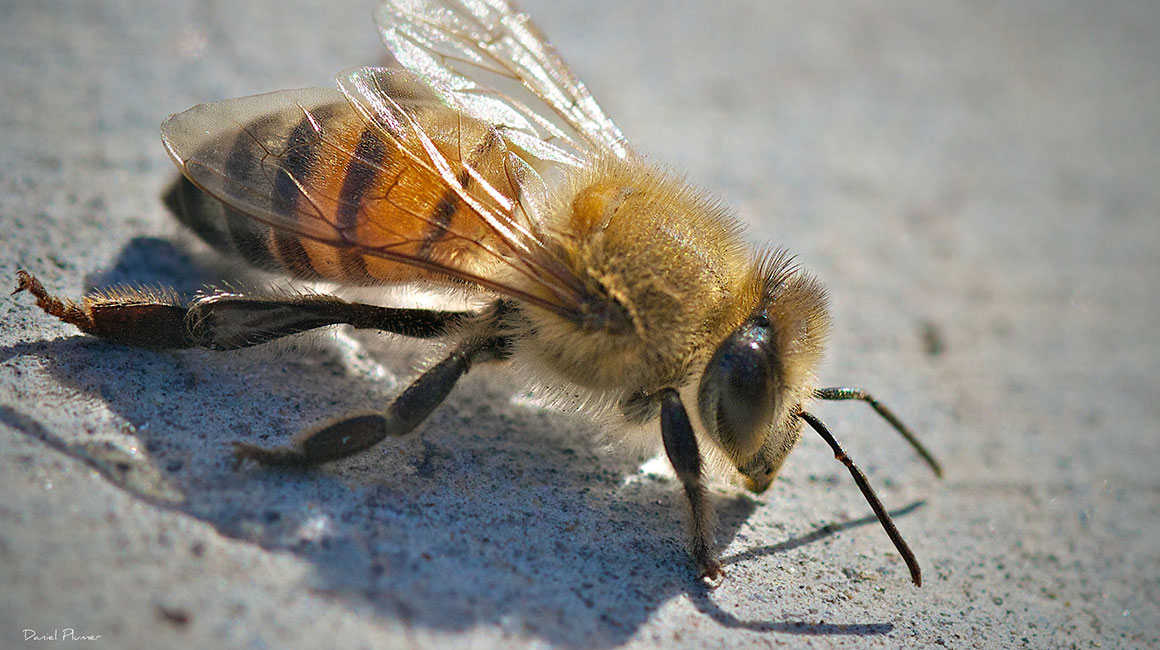

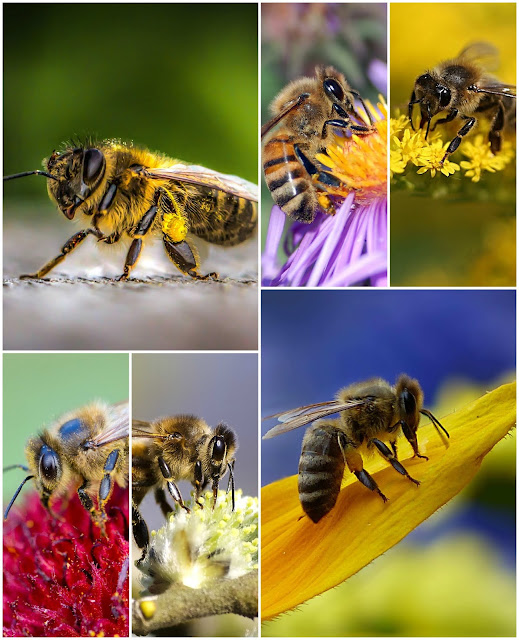

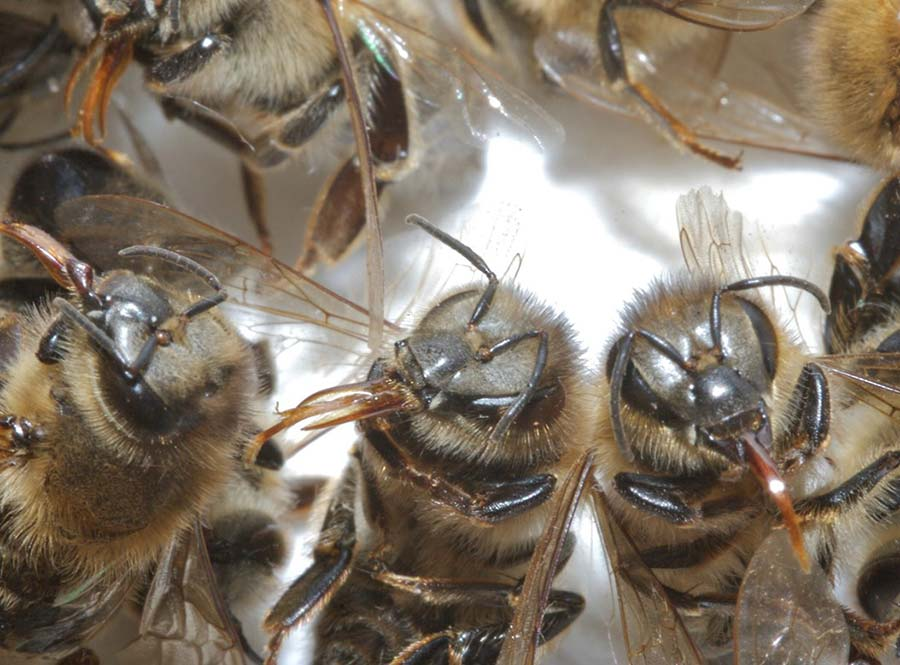

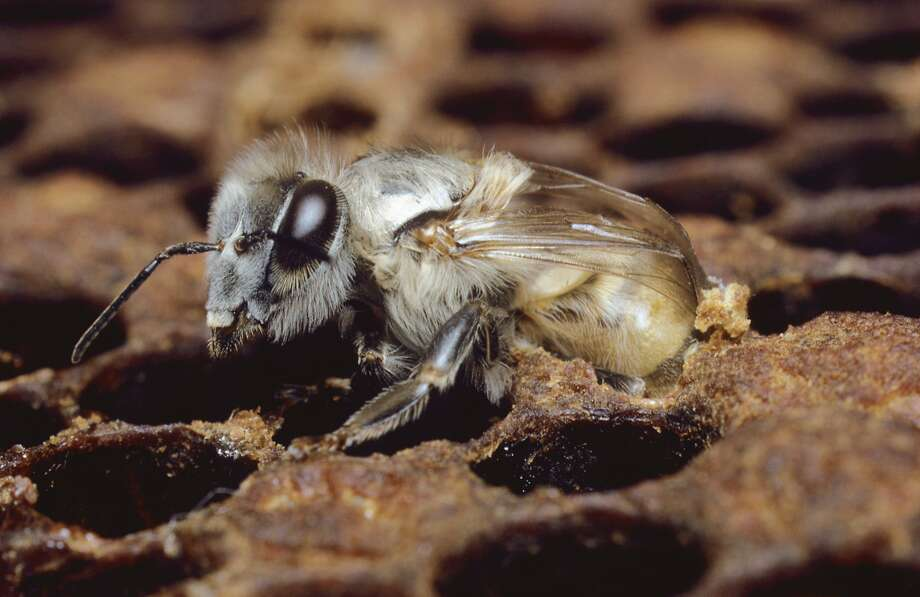

In [50]:
# prompt: display images present in this folder /content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)

import os
from glob import glob
from google.colab import drive
from IPython.display import display, Image

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

# Update the root directory with the correct folder name
image_folder = '/content/drive/MyDrive/dataset fram_insect/farm_insects/Africanized Honey Bees (Killer Bees)'

# List to store paths of all images
image_paths = glob(os.path.join(image_folder, '*.*'))

# Output the number of images found and the first few paths
print("Number of images found:", len(image_paths))
print("First few image paths:", image_paths[:5])

# Display the first 5 images (you can change this number)
for image_path in image_paths[:5]:
    try:
        display(Image(filename=image_path))
    except Exception as e:
        print(f"Error displaying image {image_path}: {e}")

In [51]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [52]:

image_data='/content/drive/MyDrive/mainnn/farm_insects'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

Files_Name
0                            Corn Borers
1                 Western Corn Rootworms
2                       Tomato Hornworms
3                          Corn Earworms
4                         Fall Armyworms
5                           Spider Mites
6                            Fruit Flies
7                                 Thrips
8                          Citrus Canker
9                Colorado Potato Beetles
10  Africanized Honey Bees (Killer Bees)
11                                Aphids
12           Brown Marmorated Stink Bugs
13                             Armyworms
14                       Cabbage Loopers

In [53]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 1591 files belonging to 15 classes.
Using 1273 files for training.
Found 1591 files belonging to 15 classes.
Using 318 files for validation.


In [54]:
class_names = train.class_names
class_names

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

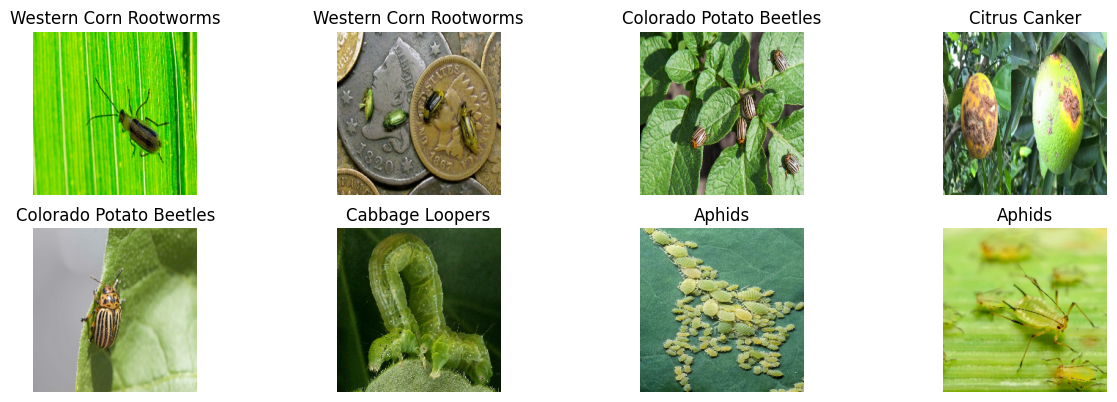

In [55]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [56]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [57]:
base_model = keras.applications.MobileNetV3Small(input_shape=(224, 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')
base_model.trainable = False


In [58]:
keras_model = keras.models.Sequential()
keras_model.add(keras.Input(shape=(224, 224, 3)))
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(15, activation=tf.nn.softmax))


In [59]:
keras_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │         423,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362,495 (5.20 MB)

 Trainable params: 423,375 (1.62 MB)

 Non-trainable params: 939,120 (3.58 MB)

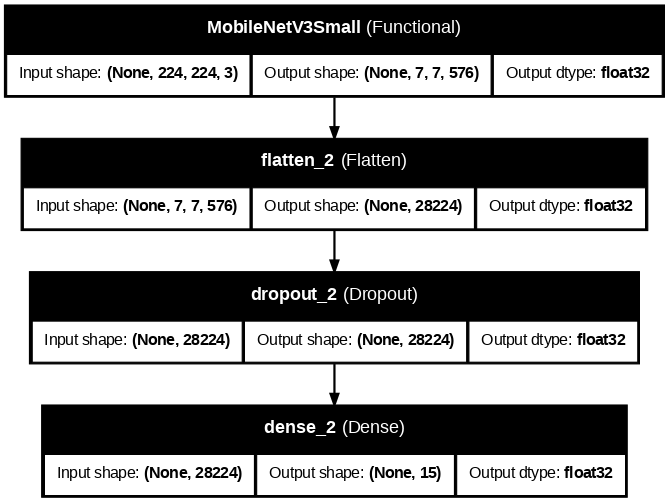

In [60]:

tf.keras.utils.plot_model(keras_model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          show_dtype=True,
                          dpi=80)

In [61]:

keras_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [62]:
early_stopping =EarlyStopping(patience=15, restore_best_weights=True)

In [63]:
keras_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = keras_model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping])


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.2868 - loss: 5.9577 - val_accuracy: 0.8491 - val_loss: 0.9255
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 980ms/step - accuracy: 0.8918 - loss: 0.7034 - val_accuracy: 0.9119 - val_loss: 0.7492
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9350 - loss: 0.4687 - val_accuracy: 0.9308 - val_loss: 0.6072
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9481 - loss: 0.4041 - val_accuracy: 0.9119 - val_loss: 0.8103
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9630 - loss: 0.3374 - val_accuracy: 0.9308 - val_loss: 0.6906
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 1000ms/step - accuracy: 0.9675 - loss: 0.3035 - val_accuracy: 0.9151 - val_loss: 0.7674
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9572 - loss: 0.3952 - val_accuracy: 0.9214 - val_loss: 0.8593
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9646 - loss: 0.4076 - val_accuracy: 0.9182 - va

In [64]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy      loss  val_accuracy  val_loss
0   0.399843  5.223874      0.849057  0.925472
1   0.867243  0.906152      0.911950  0.749203
2   0.927730  0.531467      0.930818  0.607214
3   0.948154  0.469590      0.911950  0.810349
4   0.959152  0.441701      0.930818  0.690581
5   0.959152  0.396023      0.915094  0.767402
6   0.951296  0.448027      0.921384  0.859298
7   0.960723  0.501015      0.918239  1.034973
8   0.957581  0.422835      0.915094  1.031787
9   0.959152  0.495560      0.924528  0.893849
10  0.960723  0.631459      0.911950  1.057656
11  0.971720  0.268651      0.911950  1.209144
12  0.953653  0.451220      0.899371  1.121795
13  0.957581  0.505054      0.918239  1.057687
14  0.951296  0.565026      0.915094  1.112194
15  0.963079  0.559087      0.921384  1.180570
16  0.967007  0.511836      0.911950  1.313436
17  0.968578  0.389671      0.921384  1.019501

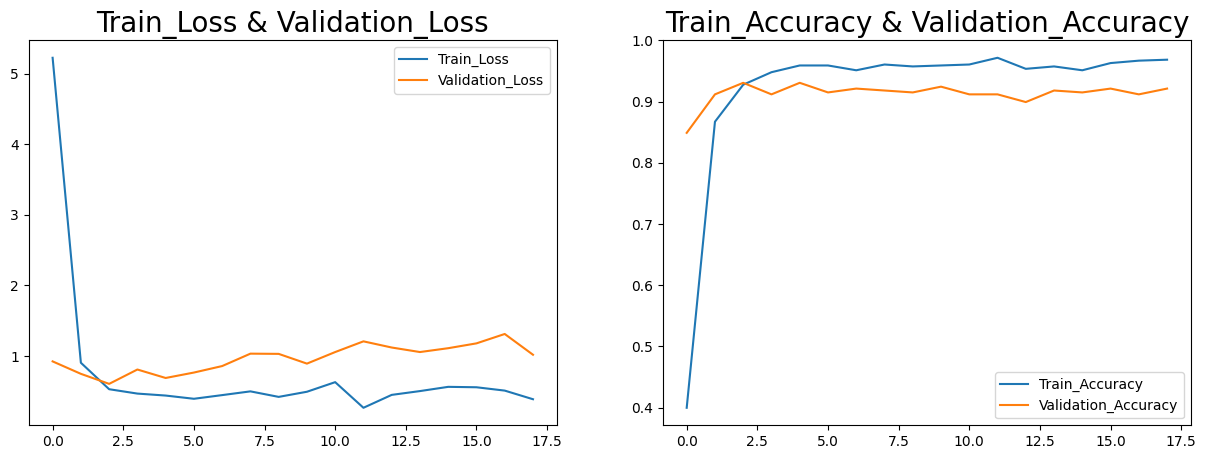

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [66]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step


Actual  Prediction
0         8           8
1         7           7
2        10          10
3        12          12
4         1           1
..      ...         ...
313       3           3
314       1           1
315       1           1
316       4           4
317       9           9

[318 rows x 2 columns]

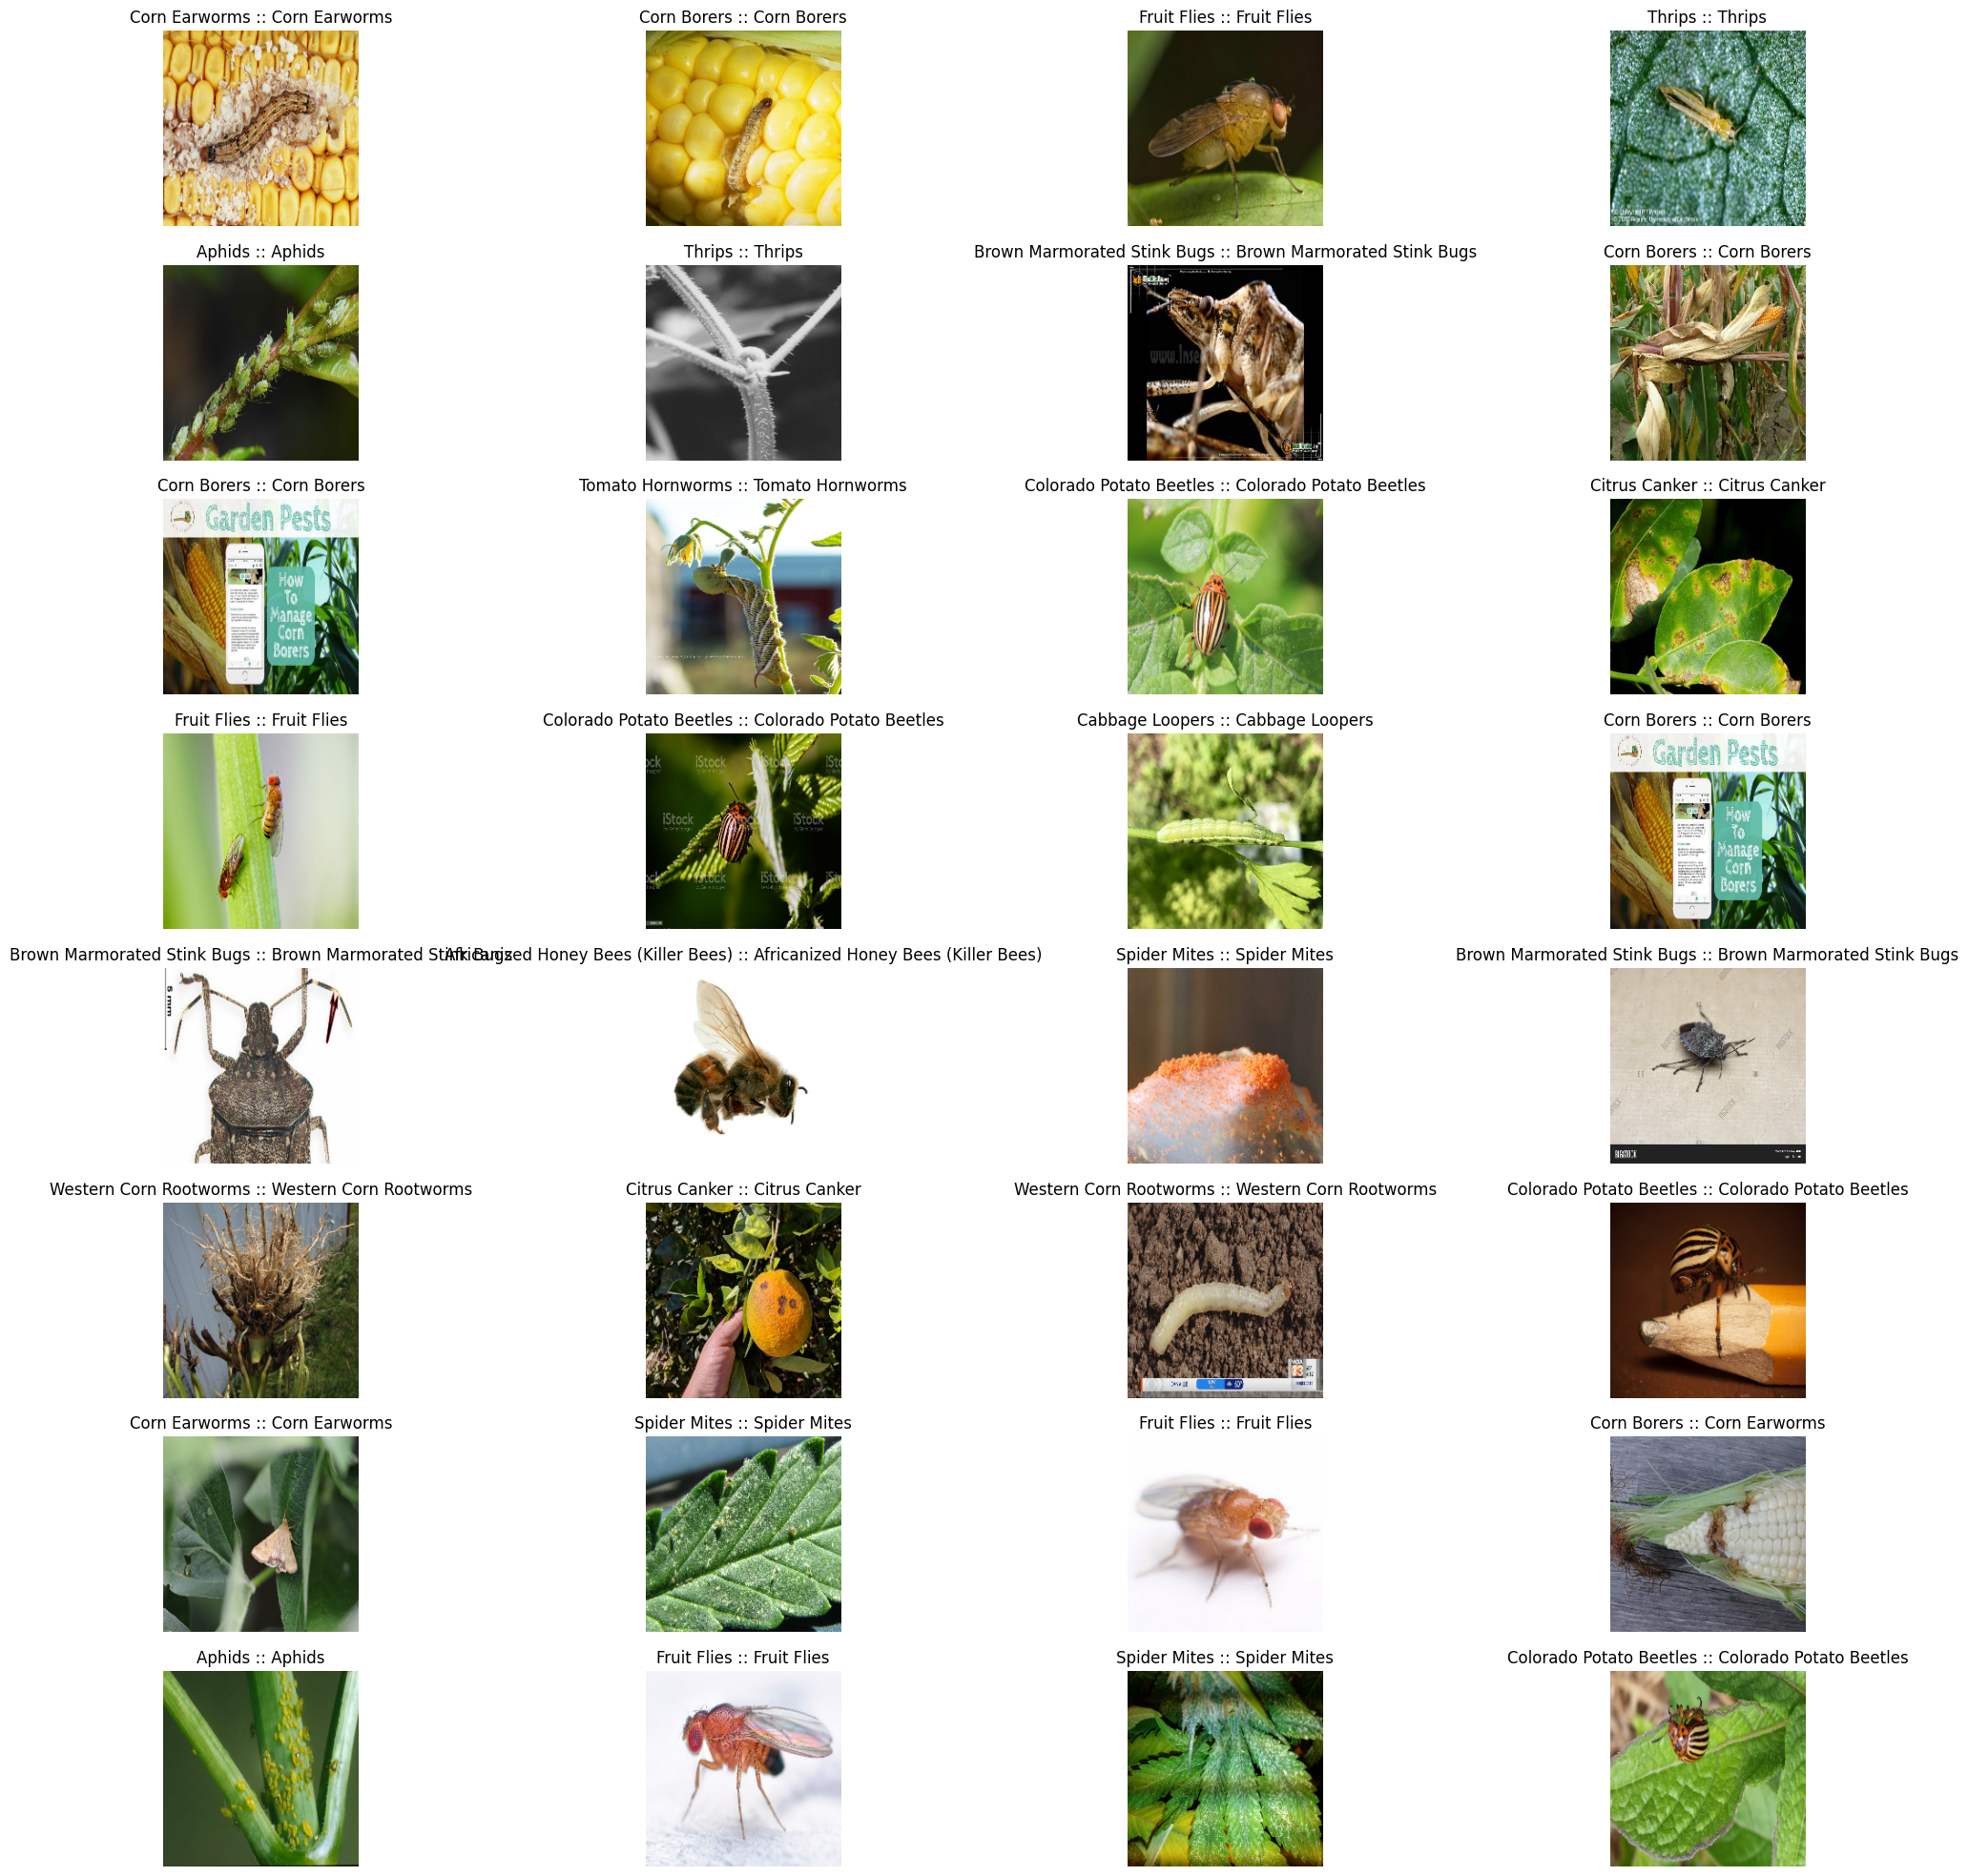

In [67]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

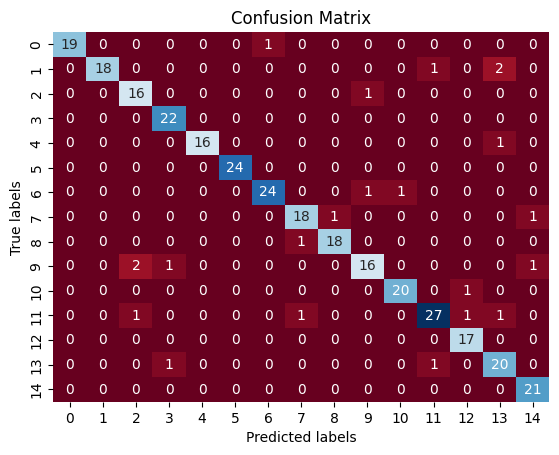

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0, 27,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [68]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [69]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 93.082%
